# Classifying Shooting Incident Fatality
We have partnered with, a leading data analytics firm specializing in urban crime analysis, they have initiated a project to enhance response strategies through data-driven insights and efficient allocation of resources based on severity prioritization in New York City.

They aim is to provide actionable insights to law enforcement agencies for the development of targeted policing strategies. The task is to develop a machine learning model to analyze historical shooting incident data, classifying them as fatal or non-fatal. This model will provide valuable insights into the factors influencing fatality rates and the ability to focus on high priority areas. (Predict: STATISTICAL_MURDER_FLAG - TRUE or FALSE)

# About the dataset

**incident_key** - Randomly generated persistent ID for each arrest

**occur_date** - Exact date of the shooting incident

**occur_time** - Exact time of the shooting incident

**boro** - Borough where the shooting incident occurred

**loc_of_occur_desc** - (no description provided)

**precinct** - Precinct where the shooting incident occurred

**jurisdiction_code** - Jurisdiction where the shooting incident occurred. Jurisdiction codes 0(Patrol), 1(Transit) and 2(Housing) represent NYPD whilst codes 3 and more represent non NYPD jurisdictions

**loc_classfctn_desc** - (no description provided)

**location_desc** - Location of the shooting incident

**statistical_murder_flag** - Shooting resulted in the victim's death which would be counted as a murder

**perp_age_group** - Perpetrator's age within a category

**perp_sex** - Perpetrator's sex description

**perp_race** - Perpetrator's race description

**vic_age_group** - Victim's age within a category

**vic_sex** - Victim's sex description

**vic_race** - Victim's race description

**x_coord_cd** - Midblock X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)

**y_coord_cd** - Midblock Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)

**latitude** - Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)

**longitude** - Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)

**Lon_Lat (geocoded_column)** - Longitude and Latitude Coordinates for mapping

In [1]:
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('/content/NYPD_Shooting_Incident_Data__Historic_.csv')
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1058925.000,180924.0000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1005028.000,234516.0000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1007667.938,209836.5313,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10-09-2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1006537.375,244511.1406,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,M,BLACK,45-64,M,BLACK,1024921.813,262189.4063,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)


In [4]:
df.shape

(27312, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27312 non-null  int64  
 1   OCCUR_DATE               27312 non-null  object 
 2   OCCUR_TIME               27312 non-null  object 
 3   BORO                     27312 non-null  object 
 4   LOC_OF_OCCUR_DESC        1716 non-null   object 
 5   PRECINCT                 27312 non-null  int64  
 6   JURISDICTION_CODE        27310 non-null  float64
 7   LOC_CLASSFCTN_DESC       1716 non-null   object 
 8   LOCATION_DESC            12335 non-null  object 
 9   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 10  PERP_AGE_GROUP           17968 non-null  object 
 11  PERP_SEX                 18002 non-null  object 
 12  PERP_RACE                18002 non-null  object 
 13  VIC_AGE_GROUP            27312 non-null  object 
 14  VIC_SEX               

In [6]:
df.columns

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'LOC_OF_OCCUR_DESC',
       'PRECINCT', 'JURISDICTION_CODE', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC',
       'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',
       'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD',
       'Latitude', 'Longitude', 'Lon_Lat'],
      dtype='object')

In [7]:
df.describe()

,INCIDENT_KEY,PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,2.731200e+04,27312.000000,27310.000000,2.731200e+04,27312.000000,27302.000000,27302.000000
mean,1.208605e+08,65.635362,0.326913,1.009449e+06,208127.401617,40.737892,-73.909051
std,7.341286e+07,27.305705,0.737743,1.837783e+04,31886.377756,0.087525,0.066272
min,9.953245e+06,1.000000,0.000000,9.149281e+05,125756.718800,40.511586,-74.249303
25%,6.386088e+07,44.000000,0.000000,1.000029e+06,182834.335950,40.668481,-73.943027
50%,9.037222e+07,68.000000,0.000000,1.007731e+06,194486.570300,40.700318,-73.915221
75%,1.888102e+08,81.000000,0.000000,1.016838e+06,239518.468800,40.824067,-73.882330
max,2.611902e+08,123.000000,2.000000,1.066815e+06,271127.687500,40.910818,-73.702046


In [8]:
df.isnull()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,False,False,False,False,True,False,False,True,True,False,...,True,True,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,True,True,False,...,True,True,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,True,True,False,...,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,True,True,False,...,True,True,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27308,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27309,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27310,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
features =['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'LOC_OF_OCCUR_DESC',
       'PRECINCT', 'JURISDICTION_CODE', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC',
       'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',
       'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD',
       'Latitude', 'Longitude', 'Lon_Lat']

In [10]:
for feature in features:
    null_check = pd.isnull(df[feature])
null_check

null_check.value_counts()

,count
Lon_Lat,
False,27302
True,10


In [11]:
print(df.isnull().sum())

INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
LOC_OF_OCCUR_DESC          25596
PRECINCT                       0
JURISDICTION_CODE              2
LOC_CLASSFCTN_DESC         25596
LOCATION_DESC              14977
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP              9344
PERP_SEX                    9310
PERP_RACE                   9310
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                      10
Longitude                     10
Lon_Lat                       10
dtype: int64


In [12]:
# Drop unnecessary columns
df = df.drop(['OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'LOC_OF_OCCUR_DESC', 'LOC_CLASSFCTN_DESC',
              'LOCATION_DESC', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',
              'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'Lon_Lat'], axis=1)

In [13]:
df = df.drop(columns=['INCIDENT_KEY'])

In [14]:
df.head()

,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,105,0.0,False,1058925.000,180924.0000,40.662965,-73.730839
1,40,0.0,False,1005028.000,234516.0000,40.810352,-73.924942
2,108,0.0,True,1007667.938,209836.5313,40.742607,-73.915492
3,44,0.0,False,1006537.375,244511.1406,40.837782,-73.919457
4,47,0.0,True,1024921.813,262189.4063,40.886238,-73.852910


In [15]:
df['STATISTICAL_MURDER_FLAG'] = df['STATISTICAL_MURDER_FLAG'].replace({True:1,False:0})

<ipython-input-15-bc8570c9a075>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['STATISTICAL_MURDER_FLAG'] = df['STATISTICAL_MURDER_FLAG'].replace({True:1,False:0})


In [16]:
df.head()

,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,105,0.0,0,1058925.000,180924.0000,40.662965,-73.730839
1,40,0.0,0,1005028.000,234516.0000,40.810352,-73.924942
2,108,0.0,1,1007667.938,209836.5313,40.742607,-73.915492
3,44,0.0,0,1006537.375,244511.1406,40.837782,-73.919457
4,47,0.0,1,1024921.813,262189.4063,40.886238,-73.852910


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PRECINCT                 27312 non-null  int64  
 1   JURISDICTION_CODE        27310 non-null  float64
 2   STATISTICAL_MURDER_FLAG  27312 non-null  int64  
 3   X_COORD_CD               27312 non-null  float64
 4   Y_COORD_CD               27312 non-null  float64
 5   Latitude                 27302 non-null  float64
 6   Longitude                27302 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 1.5 MB


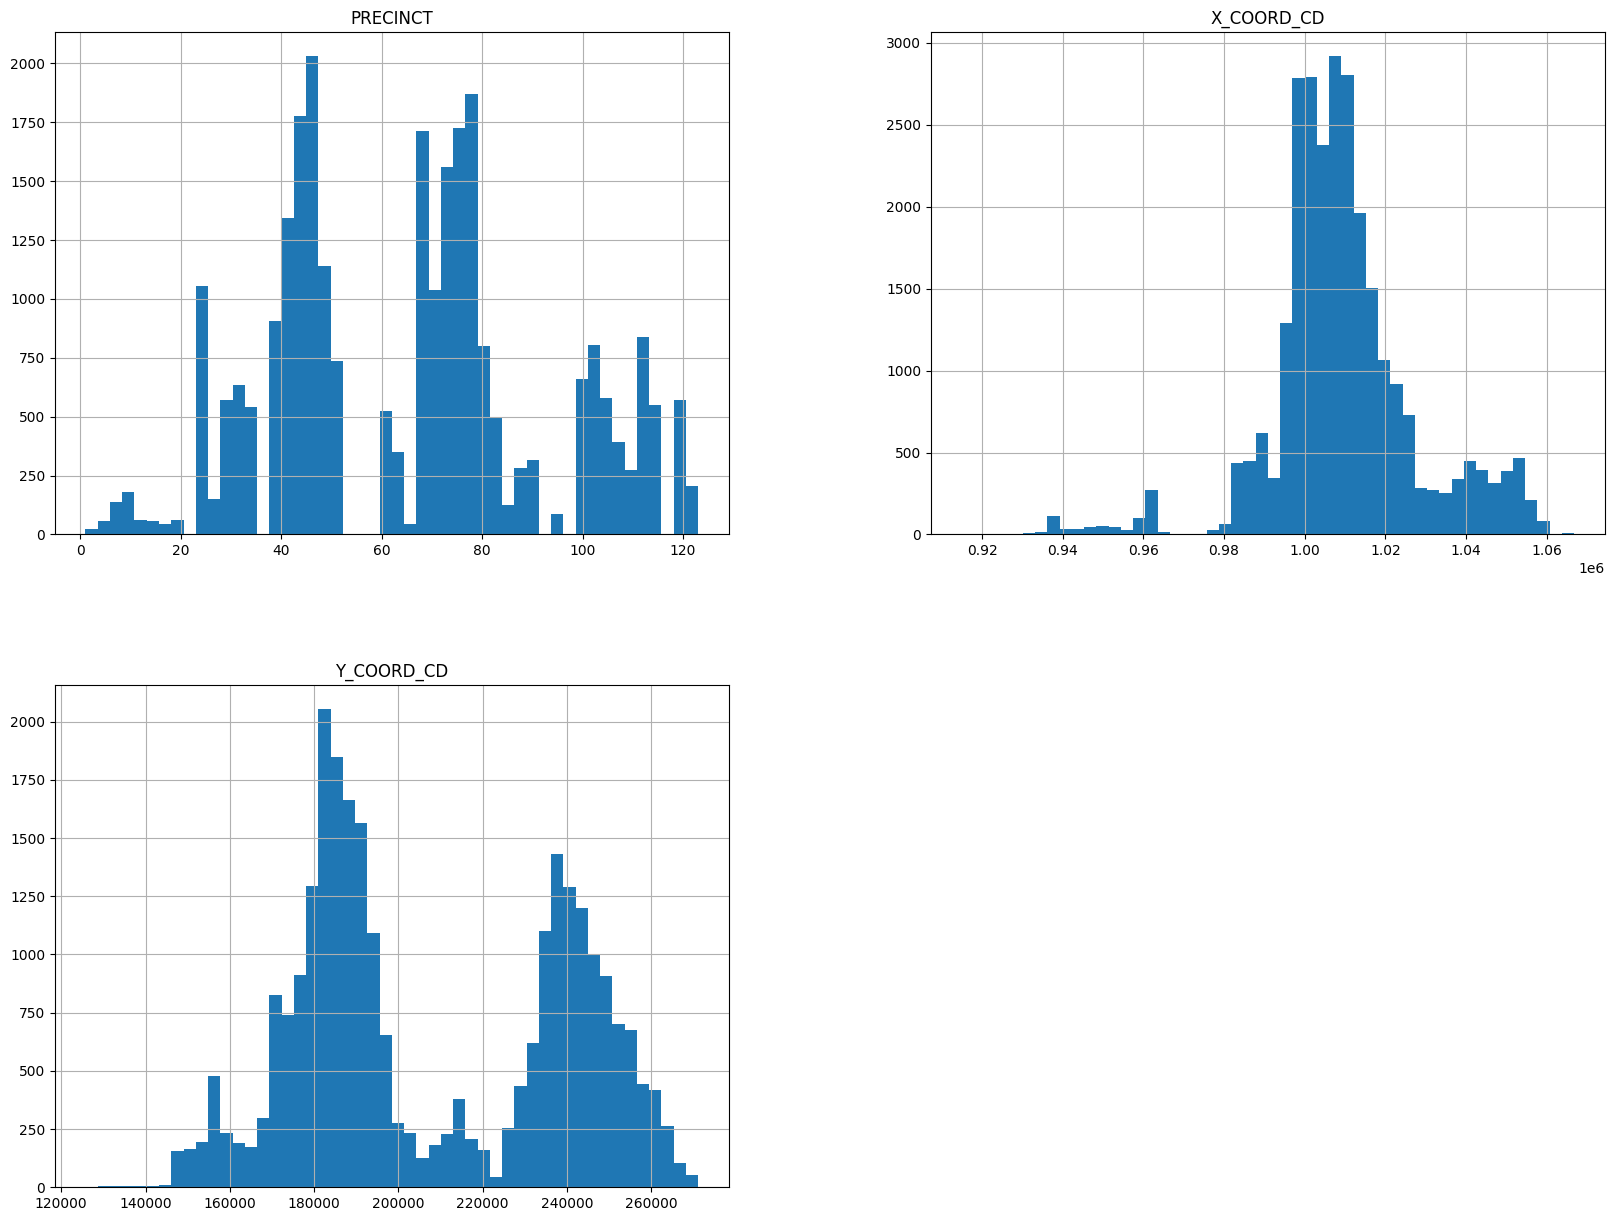

In [18]:
# Visualization - Histogram of a few numerical columns
df.hist(column=['PRECINCT', 'X_COORD_CD', 'Y_COORD_CD'], bins=50, figsize=(20, 15))
plt.show()

In [19]:
print(df.isnull().sum())

PRECINCT                    0
JURISDICTION_CODE           2
STATISTICAL_MURDER_FLAG     0
X_COORD_CD                  0
Y_COORD_CD                  0
Latitude                   10
Longitude                  10
dtype: int64


In [20]:
df = df.dropna(how='any')

In [21]:
print(df.isnull().sum())

PRECINCT                   0
JURISDICTION_CODE          0
STATISTICAL_MURDER_FLAG    0
X_COORD_CD                 0
Y_COORD_CD                 0
Latitude                   0
Longitude                  0
dtype: int64


In [22]:
df.dtypes

,0
PRECINCT,int64
JURISDICTION_CODE,float64
STATISTICAL_MURDER_FLAG,int64
X_COORD_CD,float64
Y_COORD_CD,float64
Latitude,float64
Longitude,float64


In [23]:
# Drop target column for box plot visualization
X = df.drop('STATISTICAL_MURDER_FLAG', axis=1)

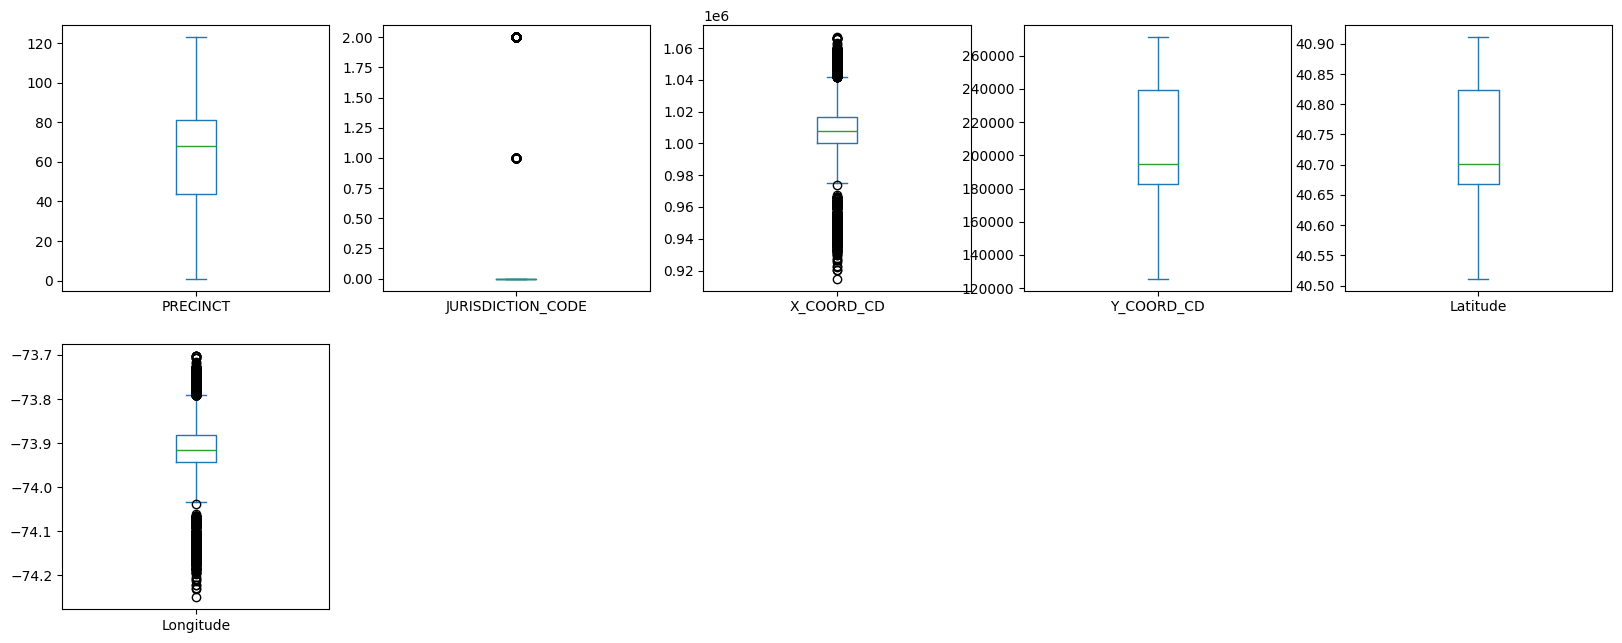

In [24]:
# Boxplot for visualizing outliers
X.plot(kind='box', subplots=True, layout=(5, 5), figsize=(20, 20))
plt.show()

In [25]:
X = df.drop('STATISTICAL_MURDER_FLAG', axis=1)
y = df['STATISTICAL_MURDER_FLAG']

In [26]:
!pip install scikit-learn


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
print(f"the shape of X_train {X_train.shape}")
print(f"the shape of X_test {X_test.shape}")
print(f"the shape of y_train {y_train.shape}")
print(f"the shape of y_test {y_test.shape}")

the shape of X_train (21840, 6)
the shape of X_test (5460, 6)
the shape of y_train (21840,)
the shape of y_test (5460,)


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(f"the shape of X_train_scaled {X_train_scaled.shape}")
print(f"the shape of X_test_scaled {X_test_scaled.shape}")
print(f"the shape of y_train {y_train.shape}")
print(f"the shape of y_test {y_test.shape}")


the shape of X_train_scaled (21840, 6)
the shape of X_test_scaled (5460, 6)
the shape of y_train (21840,)
the shape of y_test (5460,)


In [30]:
X_train_scaled

array([[ 0.33138976, -0.44398908,  0.41355753, -0.75515181, -0.75515188,
         0.41190561],
       [-0.7283079 ,  2.26345795,  0.18871599,  1.35065122,  1.35064675,
         0.19141596],
       [-0.8744731 , -0.44398908, -0.03546788,  0.97201787,  0.97219149,
        -0.03398753],
       ...,
       [ 1.31800482, -0.44398908,  0.82987298, -0.58784953, -0.58822705,
         0.82858534],
       [-0.8013905 , -0.44398908, -0.10503925,  1.14797965,  1.14817716,
        -0.10340654],
       [ 0.03905937, -0.44398908, -0.62964922, -0.97102143, -0.97042822,
        -0.63121811]])

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB()
}

# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

# Train and evaluate each model
evaluation_metrics = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    evaluation_metrics[model_name] = evaluate_model(model, X_test_scaled, y_test)

# Convert the evaluation metrics to a DataFrame for better visualization
evaluation_df = pd.DataFrame(evaluation_metrics).T



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
evaluation_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.814469,0.000000,0.000000,0.000000
Decision Tree,0.706593,0.170213,0.150049,0.159496
Random Forest,0.802015,0.253623,0.034551,0.060817
SVM,0.814469,0.000000,0.000000,0.000000
KNN,0.776923,0.214485,0.076012,0.112245
Gradient Boosting,0.813553,0.272727,0.002962,0.005859
Naive Bayes,0.813370,0.000000,0.000000,0.000000


<Axes: >

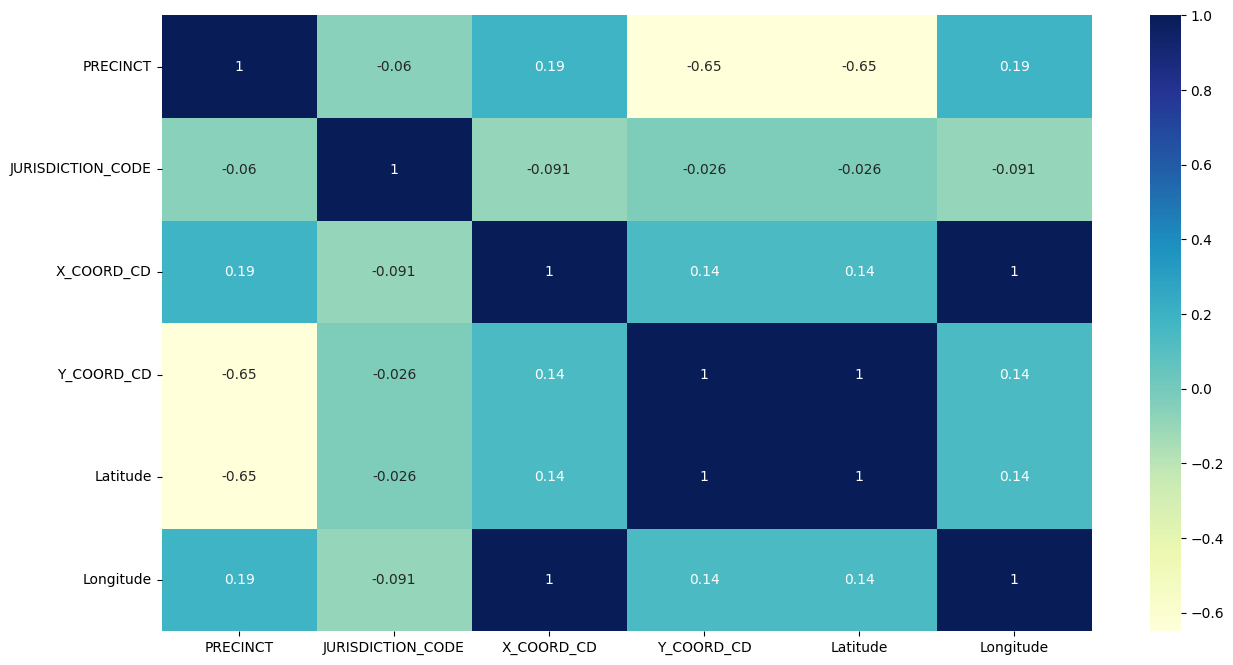

In [33]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train.corr(),annot=True,cmap="YlGnBu")

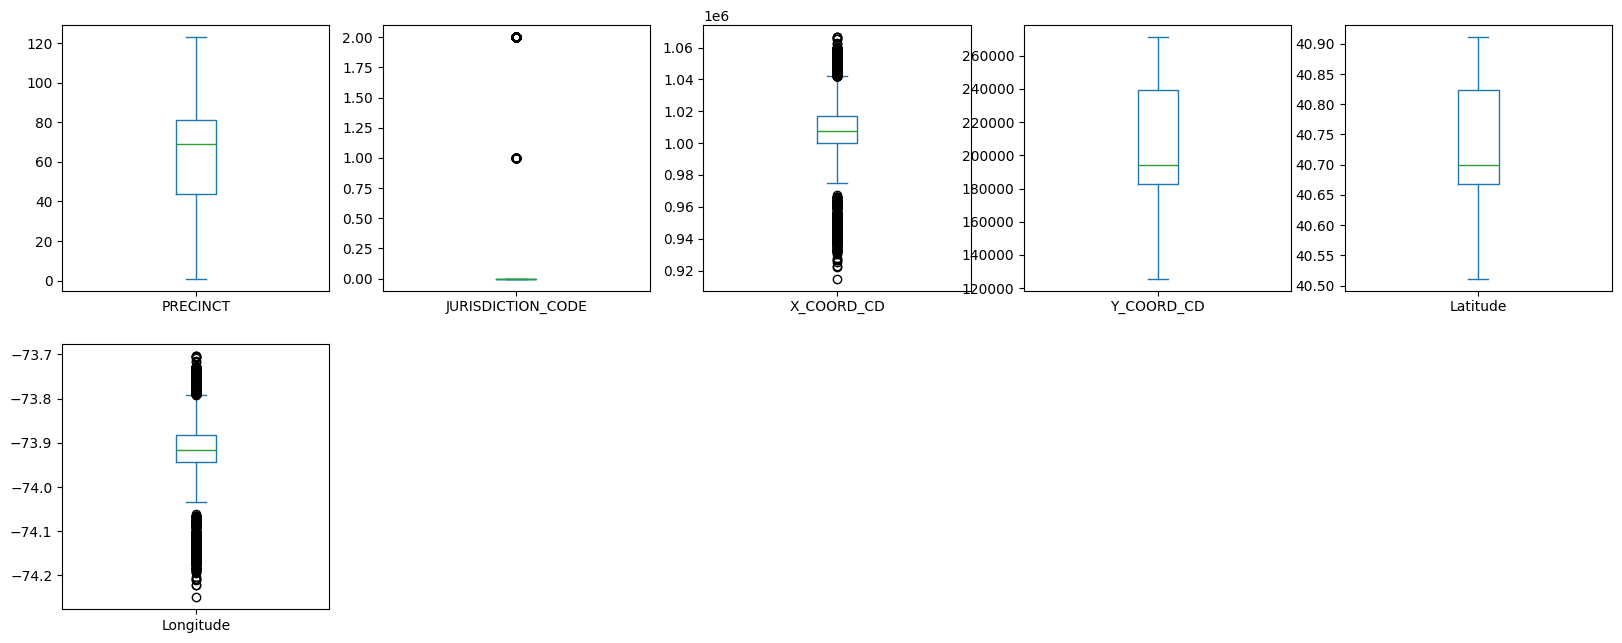

In [34]:
# Boxplot for visualizing outliers
X_train.plot(kind='box', subplots=True, layout=(5, 5), figsize=(20, 20))
plt.show()

### Outlier Treatment

In [35]:
!pip install scikit-learn

In [36]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import joblib

In [37]:
df

,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,105,0.0,0,1058925.000,180924.0000,40.662965,-73.730839
1,40,0.0,0,1005028.000,234516.0000,40.810352,-73.924942
2,108,0.0,1,1007667.938,209836.5313,40.742607,-73.915492
3,44,0.0,0,1006537.375,244511.1406,40.837782,-73.919457
4,47,0.0,1,1024921.813,262189.4063,40.886238,-73.852910
...,...,...,...,...,...,...,...
27307,48,0.0,0,1011526.000,247828.0000,40.846864,-73.901413
27308,30,0.0,0,997458.000,240485.0000,40.826743,-73.952273
27309,32,0.0,0,1000999.000,234464.0000,40.810209,-73.939496
27310,46,2.0,0,1012980.000,251028.0000,40.855644,-73.896141


In [38]:
# Preprocessing
#Since the STATISTICAL_MURDER_FLAG was a categorical column , used label encoder for safer side to change to numerical column ...
df = df.dropna(subset=['X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'STATISTICAL_MURDER_FLAG'])
label_encoder = LabelEncoder()
df['STATISTICAL_MURDER_FLAG'] = label_encoder.fit_transform(df['STATISTICAL_MURDER_FLAG'])

In [39]:
print(df.isnull().sum())

PRECINCT                   0
JURISDICTION_CODE          0
STATISTICAL_MURDER_FLAG    0
X_COORD_CD                 0
Y_COORD_CD                 0
Latitude                   0
Longitude                  0
dtype: int64


In [40]:
# Selecting features and target
features = ['X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude']
X = df[features]
y = df['STATISTICAL_MURDER_FLAG']

In [41]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
# Remove outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.05)
outliers = iso_forest.fit_predict(X_scaled)
mask = outliers != -1

X_clean = X_scaled[mask]
y_clean = y[mask]


<ipython-input-43-60df236232b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['outlier'] = outliers


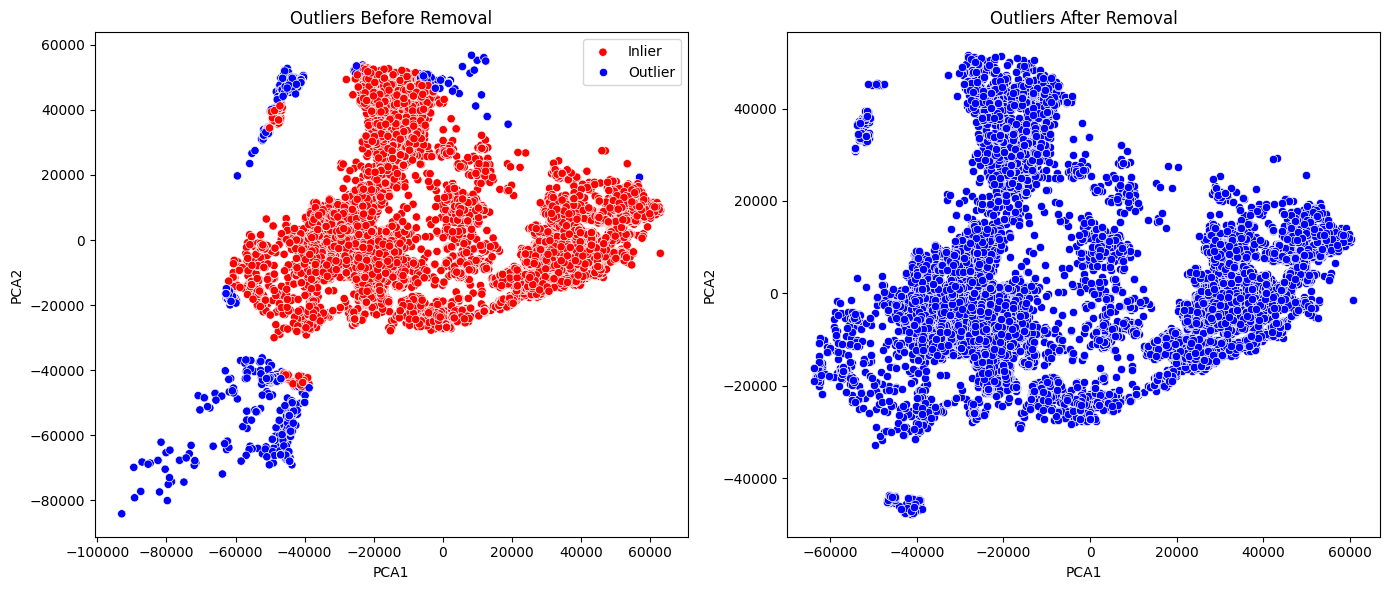

In [43]:
from sklearn.decomposition import PCA
X['outlier'] = outliers
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.drop(columns=['outlier']))
X_pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
X_pca_df['outlier'] = outliers

# Visualize Outliers Before Removal
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='outlier', data=X_pca_df, palette=['blue', 'red'])
plt.title('Outliers Before Removal')
plt.legend(['Inlier', 'Outlier'])

# Remove Outliers
X_clean = X[X['outlier'] == 1]

# Apply PCA again to the cleaned data
X_clean_pca = pca.fit_transform(X_clean.drop(columns=['outlier']))
X_clean_pca_df = pd.DataFrame(X_clean_pca, columns=['PCA1', 'PCA2'])

# Visualize Data After Outlier Removal
plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', data=X_clean_pca_df, color='blue')
plt.title('Outliers After Removal')

plt.tight_layout()
plt.show()

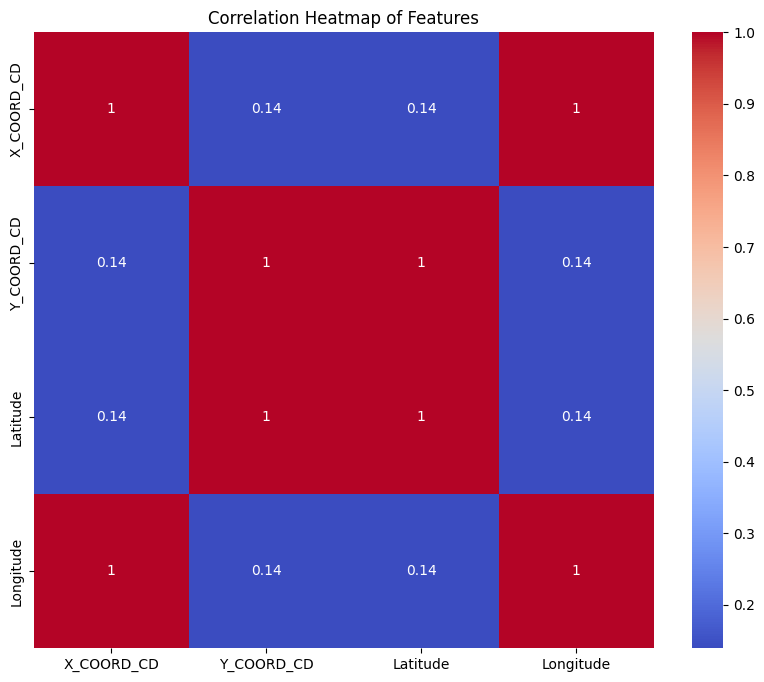

In [44]:
# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_scaled, columns=features).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

In [45]:
# Continue with model evaluation and selection
X_clean = X_clean.drop(columns=['outlier'])
X_clean_scaled = scaler.fit_transform(X_clean)

In [46]:
X_clean.head(25)

,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,1.058925e+06,180924.0000,40.662965,-73.730839
1,1.005028e+06,234516.0000,40.810352,-73.924942
2,1.007668e+06,209836.5313,40.742607,-73.915492
3,1.006537e+06,244511.1406,40.837782,-73.919457
4,1.024922e+06,262189.4063,40.886238,-73.852910
5,1.004234e+06,186461.7031,40.678457,-73.927952
6,9.988600e+05,214885.0000,40.756482,-73.947266
7,1.002883e+06,192219.7031,40.694264,-73.932809
8,1.054366e+06,196628.4063,40.706107,-73.747107
10,9.990614e+05,229911.6719,40.797726,-73.946507


In [47]:
y_clean.head()

,STATISTICAL_MURDER_FLAG
0,0
1,0
2,1
3,0
4,1


In [48]:
!pip install imblearn


In [49]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_clean,y_clean)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [50]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [51]:
# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
     'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [52]:
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [53]:
# Evaluate models
best_model_name = None
best_model = None
best_f1_score = 0

results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append((name, accuracy, precision, recall, f1))

    if f1 > best_f1_score:  # Change to F1 Score for model selection
        best_f1_score = f1
        best_model_name = name
        best_model = pipeline

# Print results in a tabular format
print(f"{'Model':<25}{'Accuracy':<10}{'Precision':<10}{'Recall':<10}{'F1 Score':<10}")
print("="*65)
for name, accuracy, precision, recall, f1 in results:
    print(f"{name:<25}{accuracy:<10.4f}{precision:<10.4f}{recall:<10.4f}{f1:<10.4f}")



Model                    Accuracy  Precision Recall    F1 Score  
Logistic Regression      0.5103    0.5112    0.4322    0.4684    
Decision Tree            0.7368    0.7552    0.6993    0.7262    
Random Forest            0.7589    0.7590    0.7576    0.7583    
Gradient Boosting        0.5631    0.5565    0.6149    0.5842    
Support Vector Machine   0.5147    0.5166    0.4315    0.4702    
Naive Bayes              0.5104    0.5127    0.3861    0.4405    
K-Nearest Neighbors      0.7055    0.6935    0.7346    0.7135    


### choosing the best model

In [54]:
# Save the best model
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [55]:
# Save the name of the best model
with open('best_model_name.txt', 'w') as f:
    f.write(best_model_name)

In [56]:
# Load the name of the best model
with open('best_model_name.txt', 'r') as f:
    best_model_name = f.read()

print(f"The best model is: {best_model_name}")

The best model is: Random Forest


In [57]:
!pip install typing_extensions==4.8.0 --upgrade
!pip install gradio
!pip install fastapi

  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
altair 5.5.0 requires typing-extensions>=4.10.0; python_version < "3.14", but you have typing-extensions 4.8.0 which is incompatible.
openai 1.57.4 requires typing-extensions<5,>=4.11, but you have typing-extensions 4.8.0 which is incompatible.
pydantic 2.10.3 requires typing-extensions>=4.12.2, but you have typing-extensions 4.8.0 which is incompatible.
typeguard 4.4.1 requires typing-extensions>=4.10.0, but you have typing-extensions 4.8.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 22.8 MB/s eta 0:00:

In [58]:
pip install --upgrade typing_extensions


In [59]:
!pip install --upgrade pydantic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.8/431.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.4 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.27.1
    Uninstalling pydantic_core-2.27.1:
      Successfully uninstalled pydantic_core-2.27.1
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.10.3
    Uninstalling pydantic-2.10.3:
      Successfully uninstalled pydantic-2.10.3


In [60]:
!pip install --upgrade gradio


### PIPELINE

In [61]:
import gradio as gr

In [62]:
# Create Gradio inference pipeline
def predict(X_COORD_CD, Y_COORD_CD, Latitude, Longitude):
    model = joblib.load('best_model.pkl')
    input_data = pd.DataFrame({
        'X_COORD_CD': [X_COORD_CD],
        'Y_COORD_CD': [Y_COORD_CD],
        'Latitude': [Latitude],
        'Longitude': [Longitude]
    })
    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)
    return 'Murder' if prediction[0]  else 'Not Murder'


In [63]:
# Define Gradio interface
interface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Number(label='X_COORD_CD'),
        gr.Number(label='Y_COORD_CD'),
        gr.Number(label='Latitude'),
        gr.Number(label='Longitude')
    ],
    outputs='text',
    title='NYPD Shooting Incident Prediction',
    description='Predict whether a shooting incident is classified as murder or not based on coordinates.'
)

# Launch the interface
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7be2cab187c52f866a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


*Conclusion*

By integrating Machine Learning with user-friendly tools, we provide valuable insights and proactive solutions for public safety. This project exemplifies the power of predictive analytics in addressing complex societal issues and underscores the importance of data-driven strategies in enhancing operational efficiency and public safety.

By implementing such a solution, we can significantly contribute to making our cities safer through advanced analytics and innovative technology solutions
